In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def u_sphere(n, d, r=1):
    pts = []
    for _ in range(n):
        u = np.random.normal(0,1,d) 
        norm=np.sum(u**2) **(0.5)
        pts.append((u/norm) * r)
    return np.array(pts)


from numpy.linalg import cholesky, inv

def u_ellipsoid(n, E, r=1):
    E = np.array(E)
    ps = u_sphere(n, E.shape[0], r)
    L = cholesky(E)
    E0 = inv(L.T)
    return np.matmul(E0, ps.T).T

##  Test sampling functions

In [6]:
ps = u_sphere(1000, 2)

ps.shape

(1000, 2)

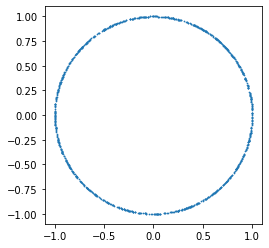

In [9]:
plt.scatter(ps[:, 0], ps[:, 1], s=.5)
plt.gca().set_aspect('equal')

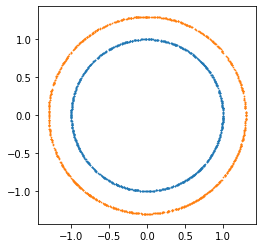

In [46]:
ps = u_sphere(1000, 2, 1)
plt.scatter(ps[:, 0], ps[:, 1], s=.5)
ps = u_sphere(1000, 2, 1.3)
plt.scatter(ps[:, 0], ps[:, 1], s=.5)
plt.gca().set_aspect('equal')

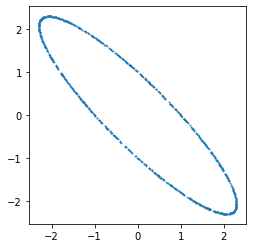

In [42]:


ps = u_ellipsoid(1000, [
    [1, .9], 
    [.9, 1]
], 1)

plt.scatter(ps[:, 0], ps[:, 1], s=.5)
plt.gca().set_aspect('equal')

##  Estimate image covarince
    
    


## Reproduce Adversarial spheres

In [79]:
batch_size = 64
n_dim = 500
r1 = 1
r2 = 1.3
rand_batch_ratio = False

def batch(num_r1=None):    
    if num_r1 is None:
        num_r1 = np.random.choice(batch_size) if rand_batch_ratio else batch_size//2

    if num_r1 > 0:
        pts1 = u_sphere(num_r1, n_dim, r1)
        pts1_labels = np.array([0]*pts1.shape[0])[:, None]
        pts1 = np.concatenate([pts1, pts1_labels], axis=1)
        
        pts = pts1
    
    if batch_size > num_r1:
        pts2 = u_sphere(batch_size - num_r1, n_dim, r2)
        pts2_labels = np.array([1]*pts2.shape[0])[:, None]
        pts2 = np.concatenate([pts2, pts2_labels], axis=1)
        
        pts = pts2
        
    if 0 < num_r1 < batch_size:
        pts = np.concatenate([pts1, pts2], axis=0)
    
    np.random.shuffle(pts)
    
    x, y = pts[:, :n_dim], pts[:, n_dim]
    return x, y


x, y = batch()

x.shape
y

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.])

0 : 0.7239778637886047 0.0


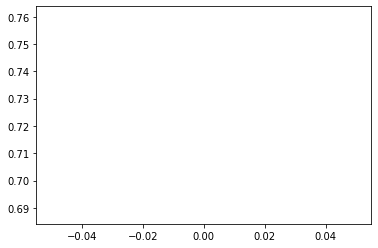

8000 : 0.5184861096739769 0.07259081990228528


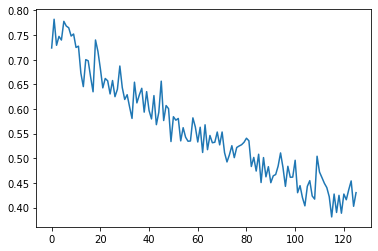

16000 : 0.3056907311081886 0.036933355789930504


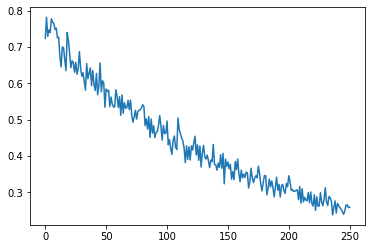

24000 : 0.19529608204960824 0.02011558451320813


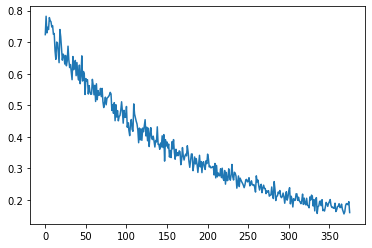

32000 : 0.13421821907162668 0.016325021735950913


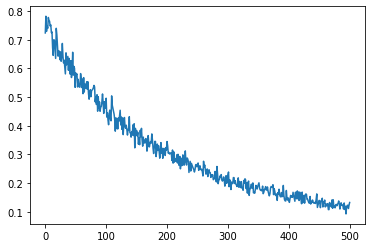

40000 : 0.09496681988239289 0.012401646982394363


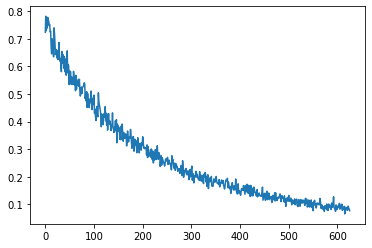

48000 : 0.06873841986060142 0.008430923094543172


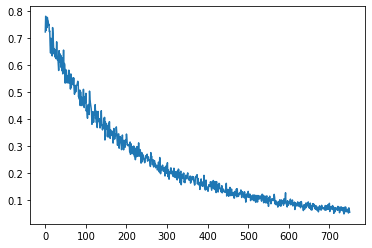

56000 : 0.05182850442826748 0.006463059634443925


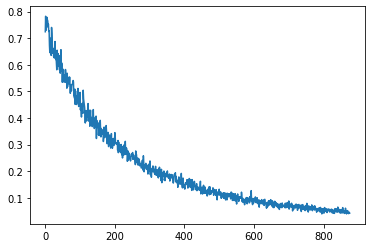

64000 : 0.03999322939664125 0.004599436861848028


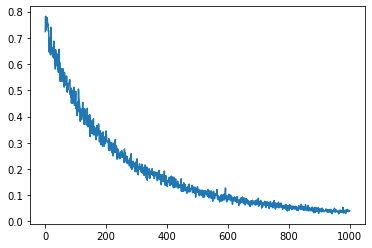

72000 : 0.031626540943980215 0.004422449608112013


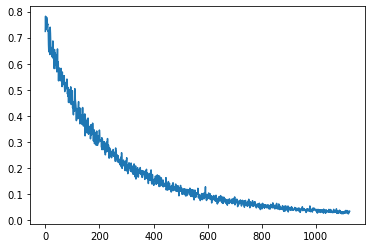

80000 : 0.026076700445264576 0.0037884944101768733


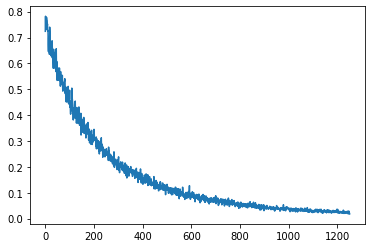

88000 : 0.02070311740040779 0.0028670789265173367


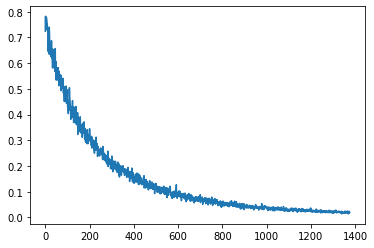

96000 : 0.017518303524702787 0.002704579073717144


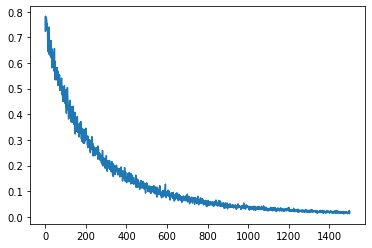

104000 : 0.014453215822577477 0.0022585368104483883


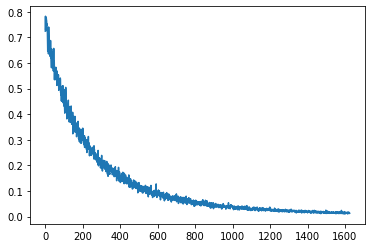

112000 : 0.013057544492185116 0.002276663589179715


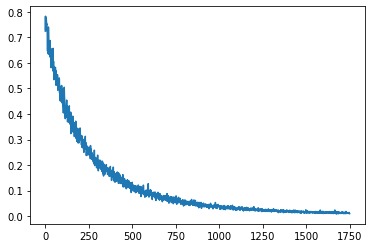

120000 : 0.011003473540768027 0.0019360466994597517


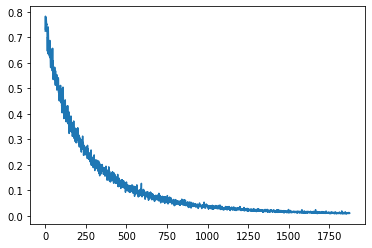

128000 : 0.009259857079014182 0.0015325621380436795


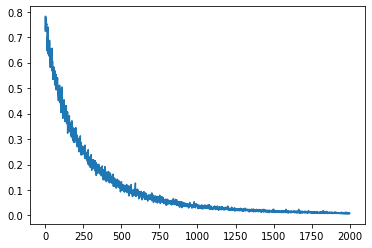

136000 : 0.008476954689249395 0.0013453143745907564


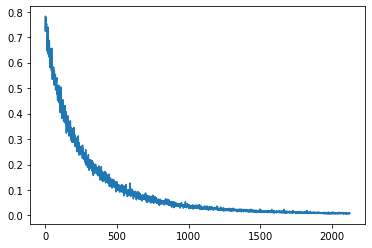

144000 : 0.007323878696188331 0.001357729716986195


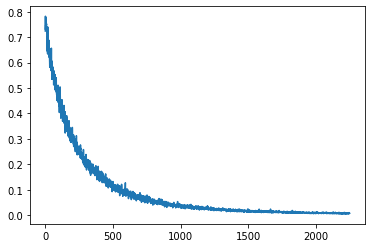

152000 : 0.006437225947156549 0.0014847989750640766


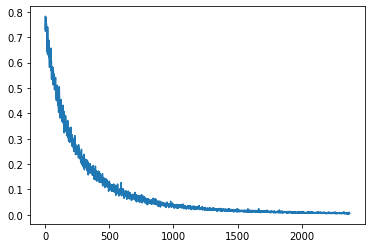

160000 : 0.005978586403653025 0.0012266310694901707


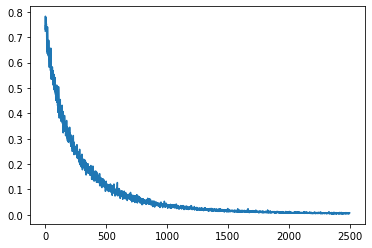

168000 : 0.0053040845599025485 0.001140558788358698


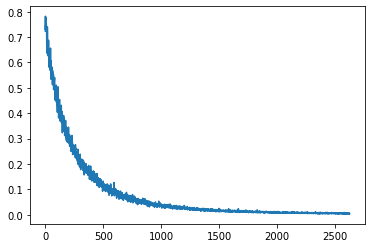

176000 : 0.004817158877849579 0.0010783083752612904


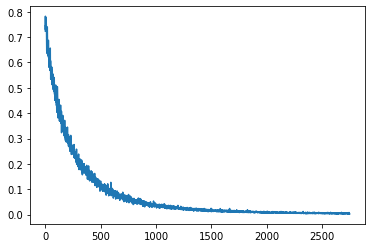

184000 : 0.004254043204709888 0.0009568608365558601


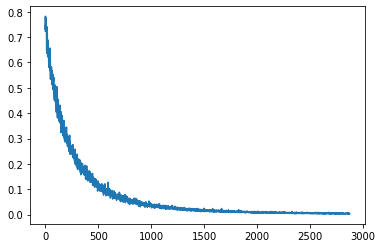

192000 : 0.0038593701273202897 0.001019315374763573


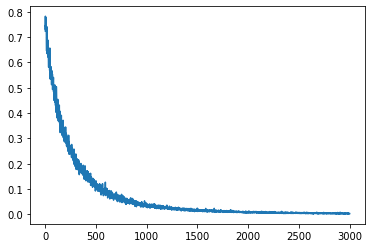

200000 : 0.0034101907163858413 0.0009566838965567218


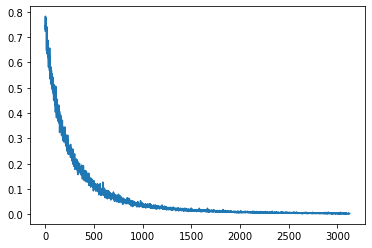

208000 : 0.0030974474642425777 0.0007445472503980655


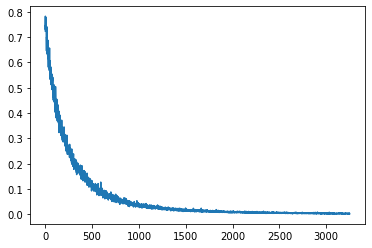

216000 : 0.00307485805824399 0.0009723688216661171


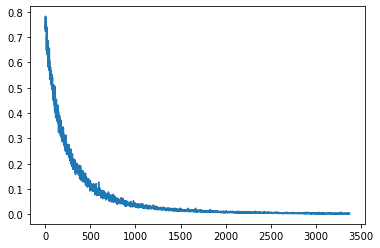

224000 : 0.0026946329325437546 0.0005837875720271884


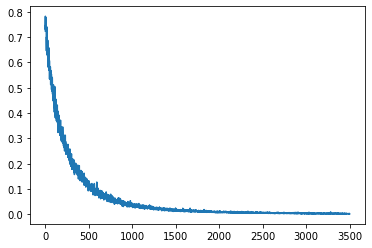

232000 : 0.0025548944994807244 0.0006561237419049046


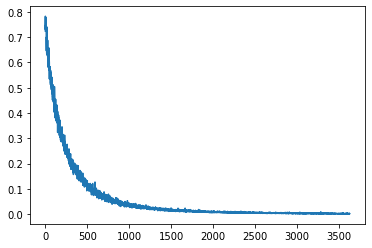

240000 : 0.0022785769123584033 0.0009467911753178138


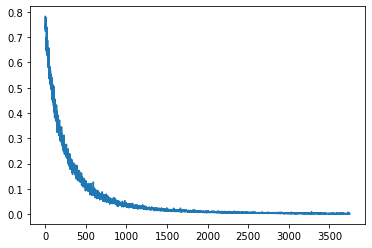

248000 : 0.0019670426193624736 0.0005108437003255737


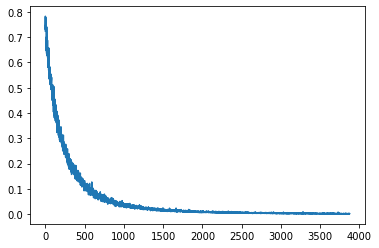

256000 : 0.002004214935004711 0.0006086869101505475


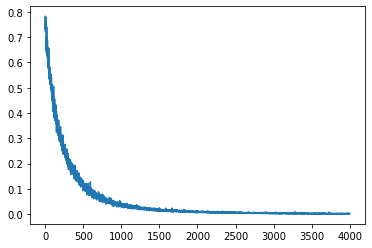

264000 : 0.0017116271797567605 0.0005586761460012501


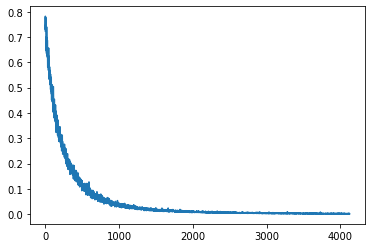

272000 : 0.0017390398681163789 0.0006385658216882984


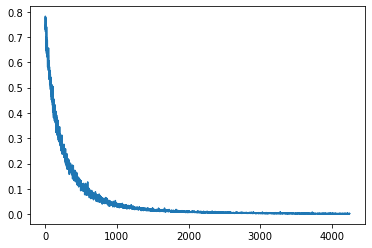

280000 : 0.001522341761738062 0.0006918072273814763


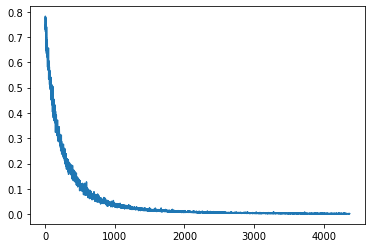

288000 : 0.0014101644046604633 0.0003820347002656961


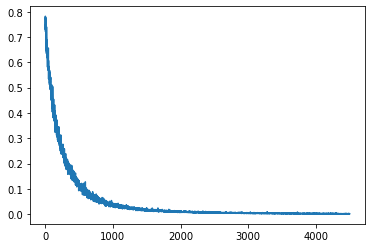

296000 : 0.001316059986129403 0.0004469521375316256


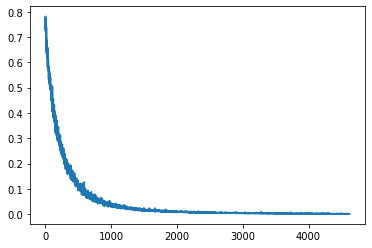

304000 : 0.001233650604262948 0.0005025379379965156


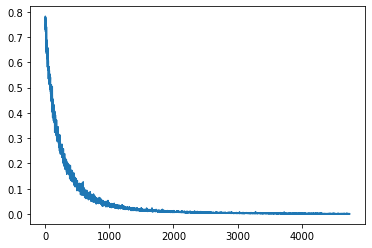

312000 : 0.0011707400064915419 0.00044373466305452545


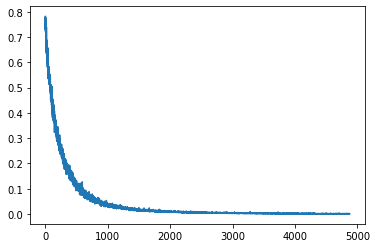

320000 : 0.001020790971815586 0.0003992894131628375


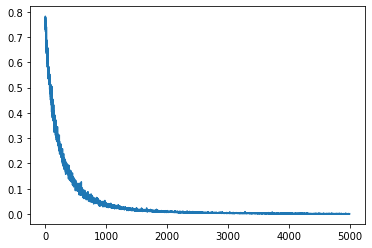

328000 : 0.0009694545902311801 0.0003331459176645822


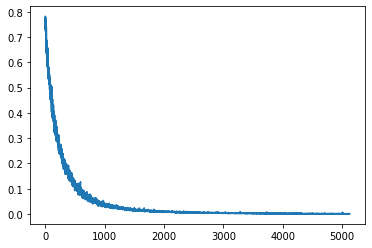

336000 : 0.0009043555147945881 0.0003883027620603002


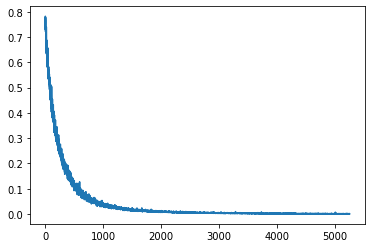

344000 : 0.0008215548470616341 0.0002838724368149466


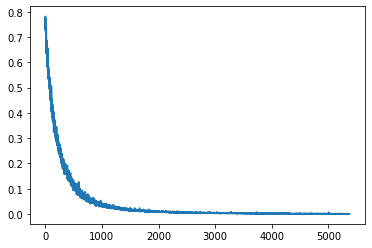

352000 : 0.0007659233268350363 0.00029955046401119095


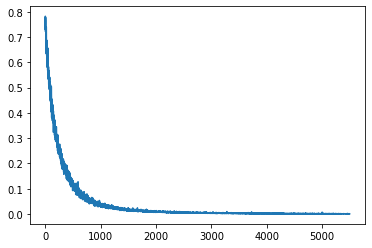

360000 : 0.0007545395009219646 0.0003900772909488448


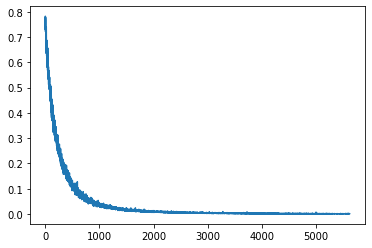

368000 : 0.000761112803593278 0.00048188651880770475


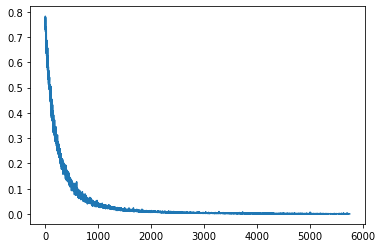

376000 : 0.0006387682259082794 0.0003354856990417038


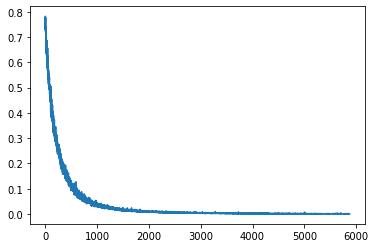

384000 : 0.0006153558194637299 0.0002869481088682383


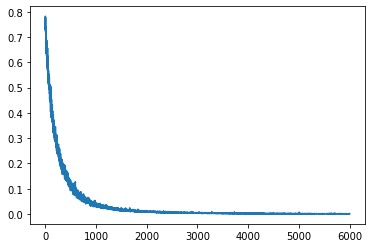

392000 : 0.0006292096665129065 0.00042125726415084846


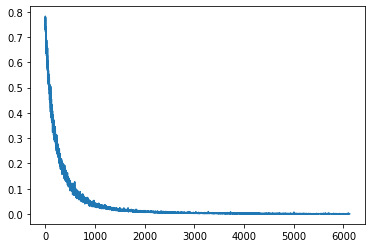

400000 : 0.0005750776268541813 0.00028523145297511667


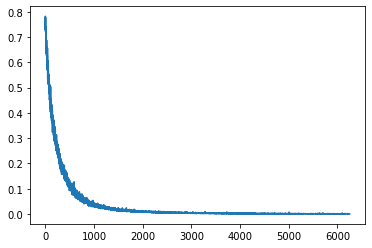

408000 : 0.00048681925982236863 0.00027144630331404234


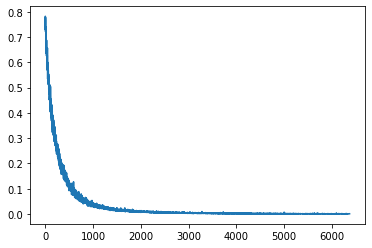

416000 : 0.0004402701370418072 0.00018329845621734003


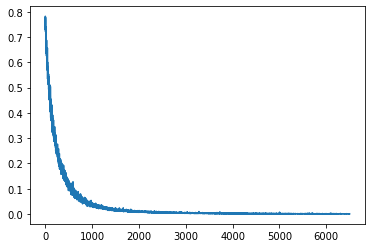

424000 : 0.0004506058618426323 0.0002212673502481392


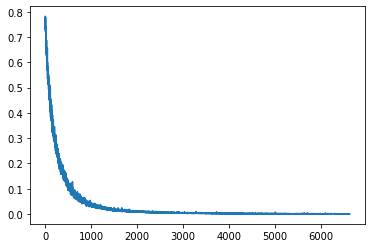

432000 : 0.0004760368820279837 0.0005180918700492451


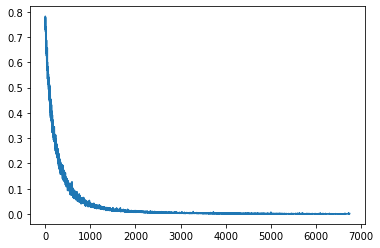

440000 : 0.00038544345647096635 0.00017637229756595327


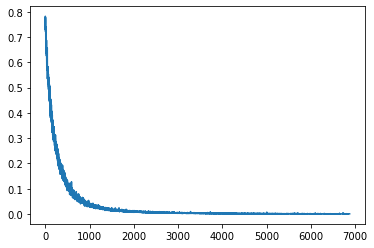

448000 : 0.0003808392211794853 0.00028329024146845337


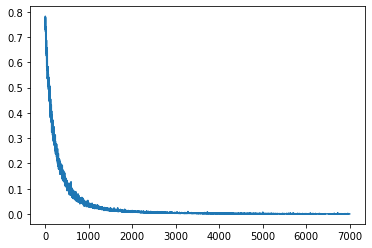

456000 : 0.00033302979543805124 0.00020758238241621539


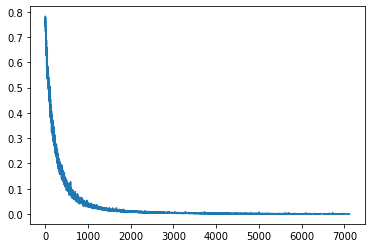

464000 : 0.0003208720870316029 0.0001829945347156196


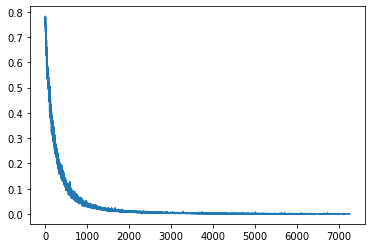

472000 : 0.00030783444643020627 0.0002464575752394819


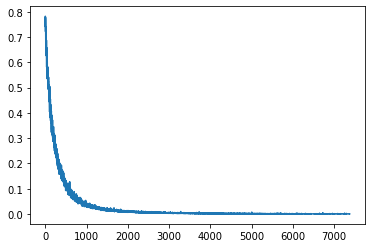

480000 : 0.0003132022172212601 0.0002836053250250549


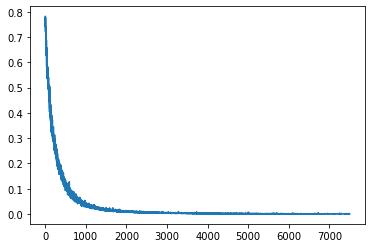

488000 : 0.0002750899642705917 0.00020522662899157652


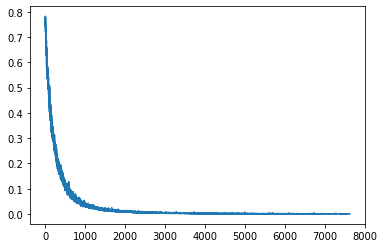

496000 : 0.00025055598467588425 0.00011874880362099795


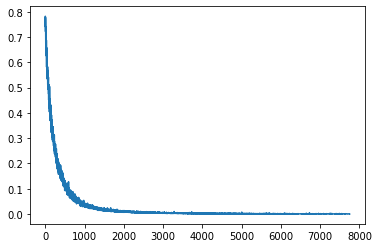

504000 : 0.00021874602884054185 0.00013070219048808818


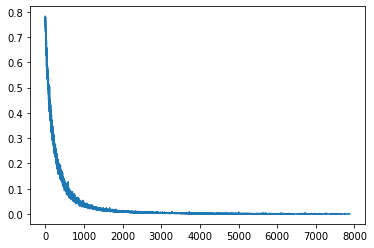

512000 : 0.00024167143739759923 0.00023441828489486542


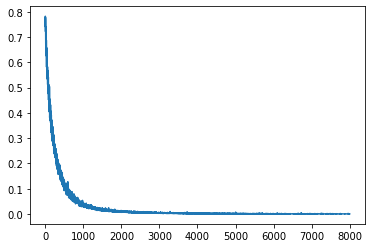

520000 : 0.00021553480997681617 0.00017297266196905994


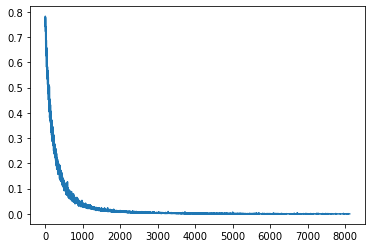

528000 : 0.0002334161289036274 0.00017099438551393875


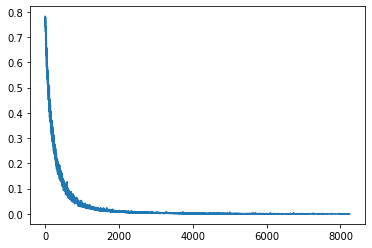

536000 : 0.0001912941038608551 0.00018798115030707296


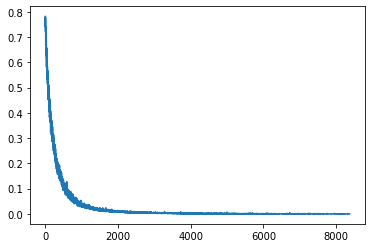

544000 : 0.0002503539901226759 0.00044906923996251114


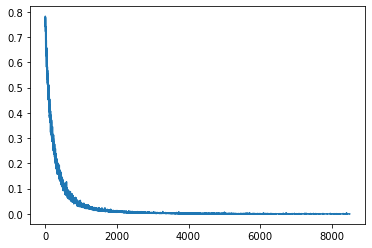

552000 : 0.000244552893564105 0.0007403021070448067


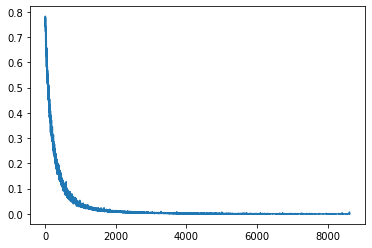

560000 : 0.00016787772998213768 9.738576122377895e-05


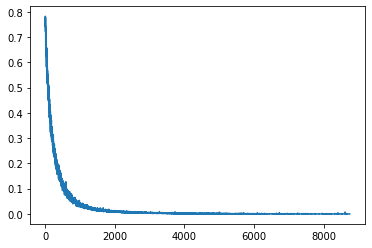

568000 : 0.00019175516441464425 0.00017400734886969423


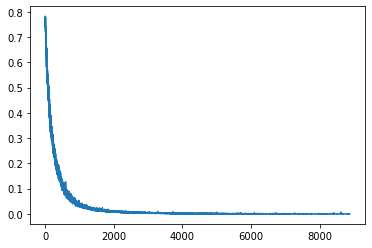

576000 : 0.00017188940197229385 0.0001523588973042952


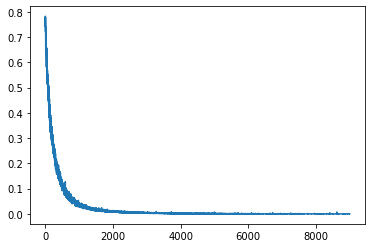

584000 : 0.00016990115866065026 0.00022519477906071314


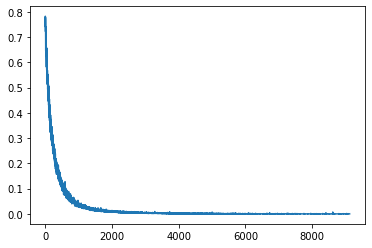

592000 : 0.00015704117715358733 0.0001437734310345834


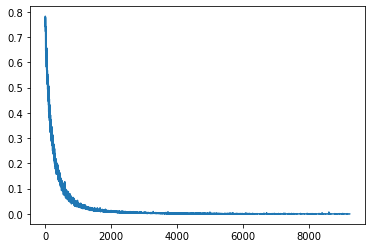

600000 : 0.00013155076652765274 9.914531323665194e-05


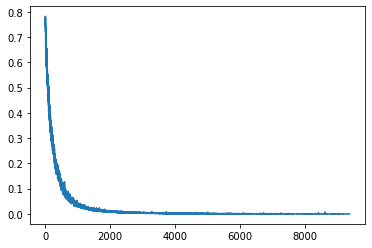

608000 : 0.00011477241292595864 8.835623658177845e-05


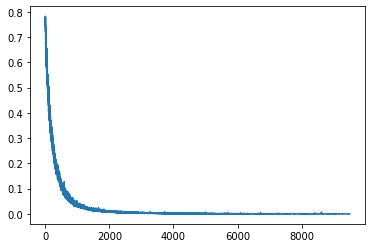

616000 : 0.00014150260016322137 0.00020838399070985167


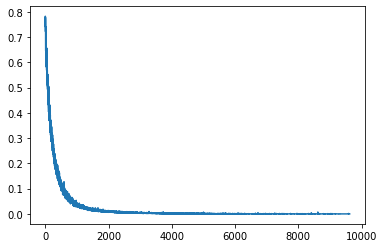

624000 : 0.00012129477225244046 0.00011704530217231575


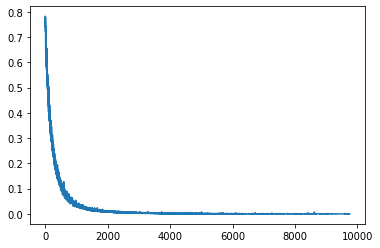

632000 : 0.00010611023753881454 0.00012566263770484994


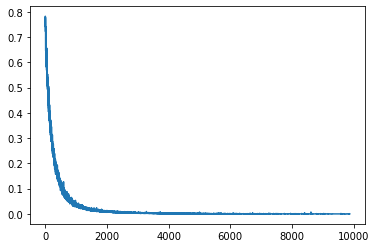

640000 : 0.00011997602880001068 0.00017367781243318918


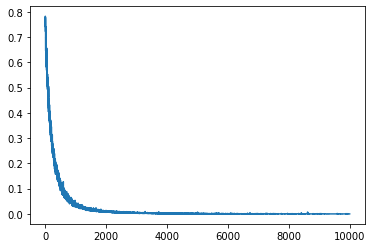

648000 : 0.00010350314900279045 0.00011777544710894561


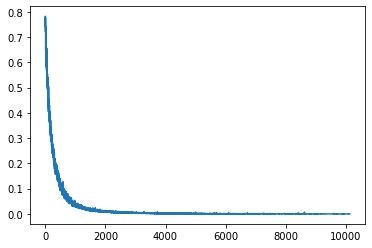

656000 : 7.747052237391472e-05 4.878994397051344e-05


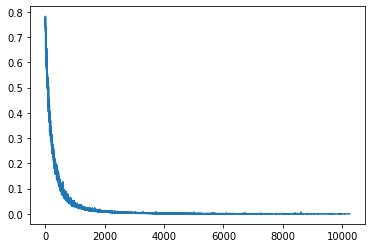

664000 : 0.00010405225679278373 0.00021150956677573488


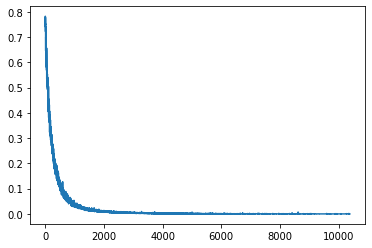

672000 : 0.00010930664837360382 0.00011824858930915165


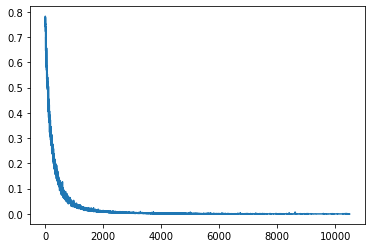

680000 : 8.803363889455795e-05 8.695172016579244e-05


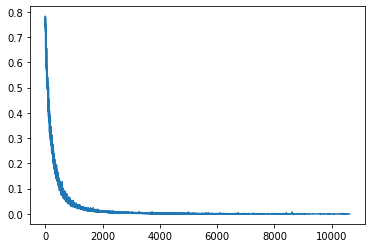

688000 : 0.00010230470448732376 0.00015739297160381106


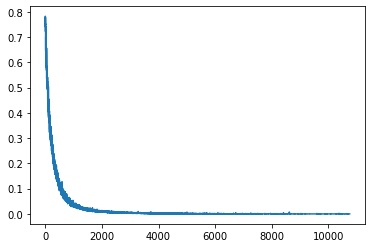

696000 : 6.93550892174244e-05 6.134139174211877e-05


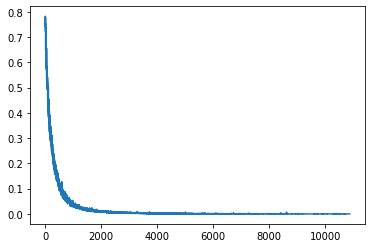

KeyboardInterrupt: 

In [132]:
import torch
import torch.nn as nn

model = None
if model is None:
    model = nn.Sequential(
        nn.Linear(500, 1000), 
        nn.BatchNorm1d(1000),
        nn.ReLU(),

        nn.Linear(1000, 1000), 
        nn.BatchNorm1d(1000),
        nn.ReLU(),
        nn.Linear(1000, 2)
    ).cuda()

loss_fn = nn.CrossEntropyLoss()
num_steps = int(1e6)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
step = 0
losses = []

while step < num_steps:
    x, y = batch()
    
    x, y = torch.tensor(x).float().cuda(), torch.tensor(y).long().cuda()
    # print(x)
    y_pred = model(x)
  
    loss = loss_fn(y_pred, y)
    losses.append(loss.item())
    if step % 1_000 == 0:
        ls = np.array(losses[-100:])
        print('step:', step, 'mean[-100:]:', ls.mean(), 'std[-100:]', ls.std())
        plt.plot(losses)
        plt.show()
  
    step += batch_size

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# ps = u_sphere(1000, 2, 1)
# ps = u_sphere(1000, 2, 1.3)

In [134]:

num_steps = int(1000)
step = 0
n_errs = []

with torch.no_grad():
    # while step < num_steps:
    for step in tqdm(range(num_steps)):
        x, y = batch()

        x, y = torch.tensor(x).float().cuda(), torch.tensor(y).long().cuda()
    
        y_pred = model(x)
        
        n_err = batch_size - (y_pred.argmax(1) == y).sum().item()
        n_errs.append(n_err)
        
        # step += batch_size
        
n_errs = np.array(n_errs)
print('n_errs', n_errs.sum())



n_errs 0


In [137]:
#for param in model.parameters():
#    param.requires_grad = False
    
model.requires_grad_(False)

Sequential(
  (0): Linear(in_features=500, out_features=1000, bias=True)
  (1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=1000, out_features=1000, bias=True)
  (4): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=1000, out_features=2, bias=True)
)

- PGD basic: 
    https://github.com/Harry24k/PGD-pytorch/blob/master/PGD.ipynb
- PGD AdverTorch:  
    https://github.com/BorealisAI/advertorch/blob/master/advertorch/attacks/iterative_projected_gradient.py#L120-L192
- PGD clever hans:        
  - fgm: https://github.com/tensorflow/cleverhans/blob/master/cleverhans/attacks/fast_gradient_method.py
  - pdg: https://github.com/tensorflow/cleverhans/blob/master/cleverhans/attacks/projected_gradient_descent.py

In [159]:
from tqdm.autonotebook import tqdm


from advertorch.utils import batch_clamp, batch_multiply, normalize_by_pnorm

# https://github.com/BorealisAI/advertorch/blob/5daeeee98077afacf94728936a04cebde474259f/advertorch/utils.py#L237

n_batches = 10

eps=0.01
alpha=0.005
iters=1000
loss = nn.CrossEntropyLoss()


def perturb(x, grad, x0):
    adv_x = x + alpha*grad.sign()
    x = torch.clamp(adv_x - x0, min=-eps, max=eps) + x0
    
    return normalize_by_pnorm(x, 2)

n_errs = d_e = 0

for _ in tqdm(range(n_batches)):
    x, y = batch(batch_size)
    x, y = torch.tensor(x).float().cuda(), torch.tensor(y).long().cuda()

    x0 = x.data.clone()

    for i in range(iters):    
        
        x.requires_grad = True    
        y_pred = model(x)
        
        model.zero_grad()
        cost = loss(y_pred, y) # .cuda()
        cost.backward()
        
        
        x = perturb(x, x.grad, x0)
        
        x = x.detach()
    
        
    y_pred = model(x)

    
    adv_mask = y_pred.argmax(1) != y
    n_errs += adv_mask.sum().item()
    
    d_e += (x-x0)[adv_mask].pow(2).sum(1).sqrt().sum().item()
    
    
print('d(E) =', d_e/n_errs  )
print('n_errs:', n_errs, 'success ratio:', n_errs/(batch_size*n_batches) )


d(E) = 0.19975199810294217
n_errs: 344 success ratio: 0.5375
